# Plotting and Visualization

Many problems encountered in EE involve processing large amounts of data.  One of the first steps here would be to visualize this data to understand what it looks like and what can be done with it.

# Assignment

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

### Dataset 1 (Straight line)
#### Using curve_fit

Estimated slope=  2.7911242448201588
Estimated intercept=  3.848800111263445
The estimated equation is 2.7911242448201588 t + 3.848800111263445


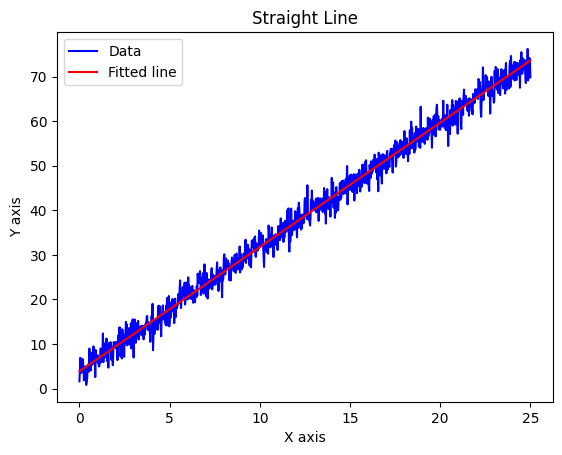

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the straight line function to be fitted
def stline(x, a, b):
    return a * x + b

# Load data from input
data = np.loadtxt("dataset1.txt")

# Extract x and y values
x = data[:, 0]
y = data[:, 1]

# Fit the line to the data
parameters, cov = curve_fit(stline, x, y)
m,c = parameters
print("Estimated slope= ",m)
print("Estimated intercept= ",c)
print(f"The estimated equation is {m} t + {c}")

plt.plot(x, y, color='b', label='Data')
         
# Plot the data along with the fitted line
z=stline(x,m,c)
plt.plot(x,z,color='r',label='Fitted line')

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Straight Line')
plt.legend()
plt.show()


#### Using lstsq

The estimated equation is 2.791124245414918 t + 3.848800101430742
Estimated slope: 2.791124245414918
Estimated intercept: 3.848800101430742


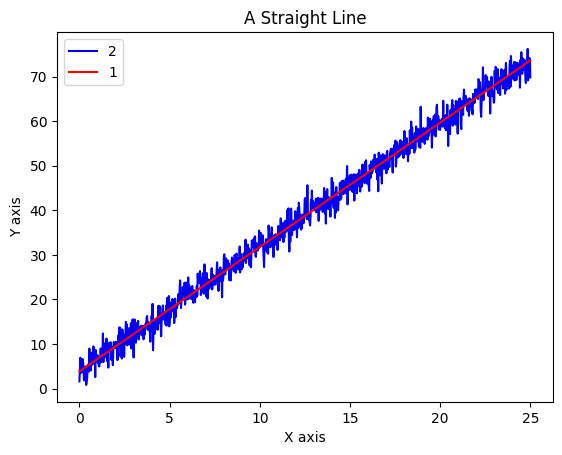

In [27]:
import numpy as np
import matplotlib.pyplot as plt
def stline(x, a, b):
    return a * x + b

data = np.loadtxt("dataset1.txt")
x = data[:, 0]
y = data[:, 1]
M = np.column_stack([x, np.ones(len(x))])

# Use the lstsq function to solve for m and c
(m, c), _, _, _ = np.linalg.lstsq(M, y, rcond=None)
print(f"The estimated equation is {m} t + {c}")

print("Estimated slope:", m)
print("Estimated intercept:", c)

yest = stline(x, m, c)
plt.plot(x, y,color='b',label="2")
plt.plot(x,yest,color='r',label="1")


plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('A Straight Line')
plt.legend()
plt.show()


#### Hence the straight line equation is y = 2.7911 x + 3.8488

### Dataset 2
#### Using curve_fit

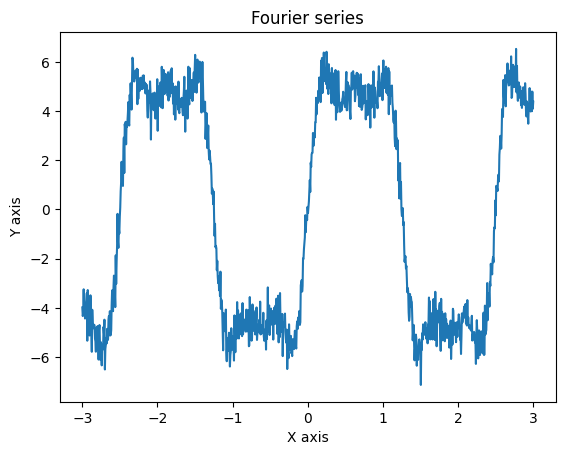

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
data=np.loadtxt('dataset2.txt')

x = data[:, 0]
y = data[:, 1]
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Fourier series")
plt.plot(x,y)

curve_fit is the best way to examine this dataset as it is a non linear function

#### To find if the function is odd / even
> To find out if the series is odd harmonic or even harmonic

In [10]:
data = np.loadtxt("dataset2.txt")
x=data[:, 0]
y=data[:, 1]
a = 0
n = int(len(x))
for i in range(n):
     a += abs(x[i] + x[len(x) - i - 1])
     average = a/len(x)
print(average)


1.523225989785715e-16


As the value appproaches zero, it is such that f(x)+f(-x)=0 indicating it is an odd function.

>f(x)=A1sin(x) + A2sin(3x) + A3sin(5x) + ....

From the graph, we can conclude that the time period is around 2.5s

 
 A1 = 5.997790206237505 
 A3 = 1.987459233681971 
 A5= 0.9713484478016966 
 A7 = -0.006633557139520629 
 A9 = -0.02815884680730263 
 A11 = -0.052204416242392915


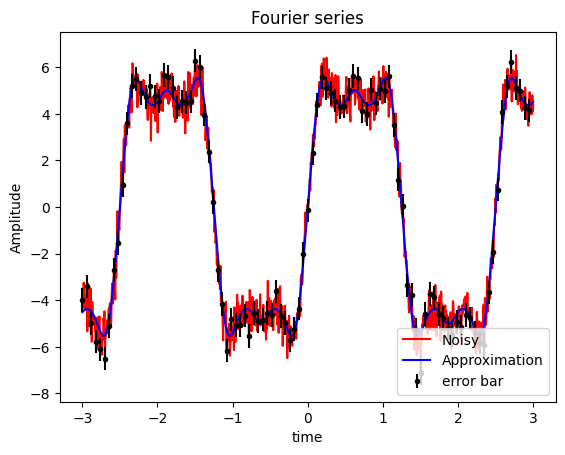

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

time_period=2.5

plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("Fourier series")

data = np.loadtxt("dataset2.txt")
x=data[:, 0]
y=data[:, 1]

m = 0
l = 0
k = 0 
j = 0 
for i in range(len(x)):  
     if (-2.5 < x[i] < -2):
              if y[i] > 6 and k != 1:
                            k += 1
                            peak1 = i
     if (0.5 > x[i] > 0):
              if y[i] > 6 and j != 1: 
                            j += 1
                            peak2 = i 
     if (-3 < x[i] < -2.5):
              if y[i] < -6 and l != 1:
                            l += 1
                            peak3 = i
     if (0 > x[i] > -0.5):
             if y[i] < -6 and m != 1:
                            m += 1
                            peak4 = i

def fourier(t, A1, A3, A5, A7,A9,A11): #Taking the amplitudes of the,odd harmonics as a parameter.
            T = time_period
            w = 2*np.pi/T
            return A1*np.sin(w*t)+A3*np.sin(3*w*t)+A5*np.sin(5*w*t)+A7*np.sin(7*w*t)+A9*np.sin(9*w*t)+A11*np.sin(11*w*t)

(A1, A3, A5, A7,A9,A11), _ = curve_fit(fourier, x[peak1:peak2], y[peak1:peak2])
plt.plot( x, y, color = 'r', label ="Noisy")
no_error = fourier(x, A1, A3,A5,A7,A9,A11)
plt.plot(x, fourier(x, A1, A3, A5, A7,A9,A11), color ='b',label='Approximation')
plt.errorbar(x[::10],y[::10], np.std(y - no_error), fmt='.',color = 'black',label ="error bar")
plt.legend(loc='lower right')
print(f" \n A1 = {A1} \n A3 = {A3} \n A5= {A5} \n A7 = {A7} \n A9 = {A9} \n A11 = {A11}")
        
        


>A1,A3 and A5 are larger than zero , but A7 ,A9 an A11 are very less and hence can be considered negligible w.r.t. A1, A3 and A5

Therfore we can say the series is a sum of 3 sinosoids 

#### Hence, f(x) = 5.99sin(wx)+1.98sin(3wx)+0.97sin(5wx)

### Dataset 3

As the function is a non linear function, it is better to use curve_fit function

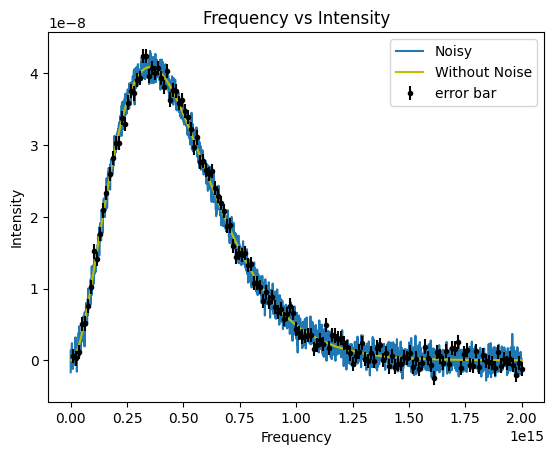

In [34]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("dataset3.txt")
x= data[:,0]
y = data[:,1]
plt.plot(x, y, label ="Noisy")
plt.xlabel("Frequency")
plt.ylabel("Intensity")
plt.title("Frequency vs Intensity")
def plancks(v, h, T):
        c = 3*10**8
        k = 1.38*10**-23
        return (2 * h * v**3 / c**2) * (1 / (np.exp(h*v/(k*T)) - 1))
(h, T),_ = curve_fit(plancks, x, y, p0 = [7*10**-34,300]) 

plt.plot(x,plancks(x, h, T), color = 'y',label='Without Noise')
no_error = plancks(x, h, T)
plt.errorbar(x[::20],y[::20], np.std(y - no_error), fmt='.',color = 'black',label ="error bar")
plt.legend(loc='upper right')